## Bagging

Bagging is an ensemble method for combining learners. Bagging consists of combining multiple "dumb" learners in order to create one intelligent ensemble learner. In bagging, multiple stumps or low level learners are created and trained on random subsets of the data. In this way, the combined decisions learned by all stump learners can equal or surpass that of a single learner. 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("2015.csv")
X = df[["Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"]]
df.replace("Eastern Asia", "Asia", inplace = True)
df.replace("Southeastern Asia", "Asia", inplace = True)
df.replace("Southern Asia", "Asia", inplace = True)
df.replace("North America", "NA-WE-ASNZ", inplace = True)
df.replace("Western Europe", "NA-WE-ASNZ", inplace = True)
df.replace("Australia and New Zealand", "NA-WE-ASNZ", inplace = True)
feature_names = list(X.columns)
y = df[["Region"]]

The data to be used for classification consists of happiness scores with economy satisfaction, family satisfaction, life expectancy, freedom, govenrmental trust, and generosity components. These are all in the form of continuous values. Additionally, for the purpose of clustering, I am using the region as a categorical response label. I have modified the regions from their original reporting as obtained via Kaggle in order to make more even the size of distinct class labels. With this being said, there are still more sub-saharan african nations than any other group. For comparison, it is the same data used in the KNN example and Decision Tree examples. 

In [8]:
from sklearn.model_selection import train_test_split
np.random.seed(99)
X = X.values
y= y.values
regions, y = np.unique(y, return_inverse=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

loss:  0.325
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.50      0.86      0.63         7
           2       0.67      0.40      0.50         5
           3       0.00      0.00      0.00         5
           4       0.88      0.88      0.88         8
           5       1.00      0.90      0.95        10

    accuracy                           0.68        40
   macro avg       0.59      0.61      0.58        40
weighted avg       0.66      0.68      0.65        40



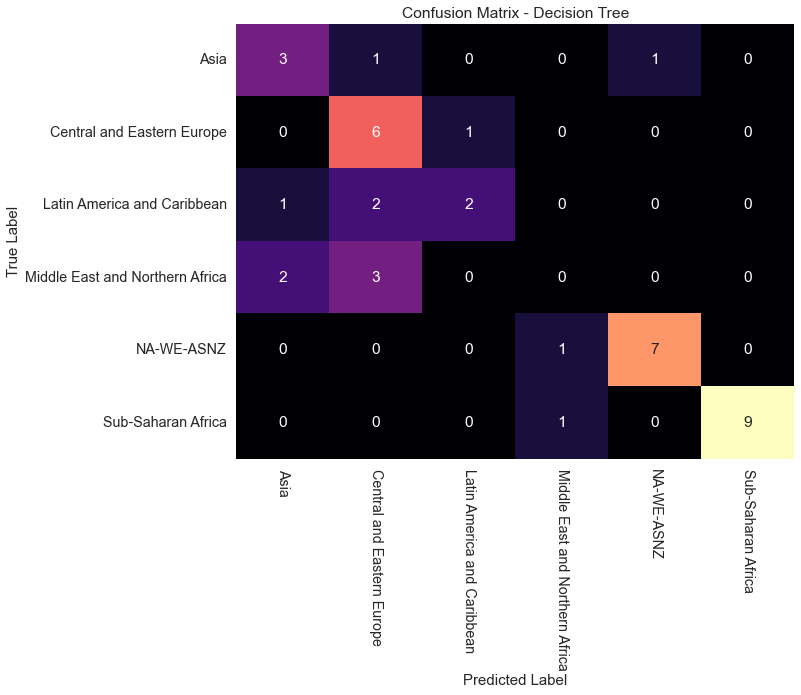

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics


bag = BaggingClassifier(DecisionTreeClassifier(max_depth = 5, random_state=99),
n_estimators=150,
bootstrap=True,
n_jobs=-1)
bag.fit(X_train, y_train)
print("loss: ", sum(y_test != bag.predict(X_test))/len(y_test))
print(metrics.classification_report(y_test, bag.predict(X_test)))

confusion_matrix = metrics.confusion_matrix(y_test, bag.predict(X_test))

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(regions, rotation = 270)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(regions, rotation=0)
plt.show()

For the bagging model, the stump learners are all decision trees with a max depth of 4. The number of stump estimators is set at 150 and sklearn's BaggingClassifier is used to create the overall bagging model. The results of the bagging classifier on classifying the regions of surveyed countries is similar to that of both KNN and Decision tree model, although the loss of 32.5% is slightly better than that of the other models on the test data. As is evident in the heatmap, the accuracy table above indicates that some regions have far higher predicition accuracy than others. Consistently the Sub-Saharan and North American/Western European/Australia New Zealand groups predict with higher accurcy and the Middle Eastern/North Africa countries have poor classification accuracies. It is possible that this is the result of more varied charactersistics for this group of countries as compared to more homogenous geographical groupings or the shared cultural identities of the Western Nations. 